<a href="https://colab.research.google.com/github/linukaratnayake/Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


51
0
100
0
105
256


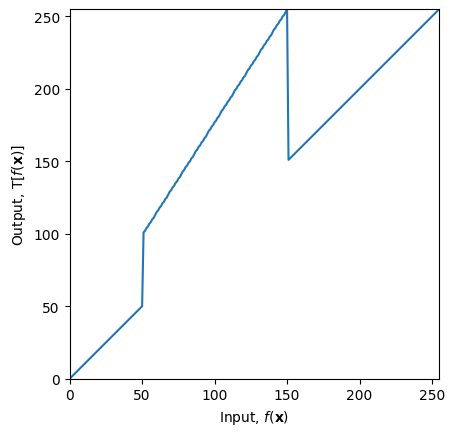

In [1]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t3))
t4 = np.linspace(c[2,1] - 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
print(len(t4))
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
print(len(t5))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

In [ ]:

img_orig = cv.imread('/content/drive/My Drive/EN3160/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()